## Before running

This is the code for the aperture photometry of the asteroid target taken by the Andalucia Faint Object Spectrograph and Camera (ALFOSC) with the FAPOL polarimeter <br>
on the 2.56-m Nordic Optical Telescope at the Observatorio del Roque de los Muchachos, La Palma.<br><br>


1. 
 * Input file:  
    * '*.fits'         Preprocessed FITS file
    * '*.mag.1'       IRAF Phot file containing target's center info.<br> 
         &nbsp;See below (i.e.,2. What you need to run this code)
    * 'mask_*.fits'      &nbsp; Masking image produced by '1.FAPOL_maksing.ipynb'.   <br>   
 
 * Outout file:
     * Phot_{DATE}_{Object_name}.csv         Photometric result of each images<br> 
             
<br><br><br>
2. What you need to run this code. The following packages must be installed.
  * astropy (https://www.astropy.org/)
  * ``*.mag.1`` file from IRAF's Phot package that contains the center of target's o-ray compnent.
<br><br><br>  
3. In this code, the center of the target is found by using the phot of IRAF. So, we need the ``.mag`` file to bring the coordinate of target's ceter.<br>
There is no problem if you find the target's center by other methods. All you need to do is modifying the part that brings the central coordinate of target. <br>
See ``Bring the x,y information of object from .mag.1`` part.
<br><br><br>    
4. Directory should contain the complete sets consist of 4 images (taken at HWP=0+90*n, 22.5+90*n, 45+90*n, 67.5+90n deg where n=0,1,2,3).<br> 
If the number of images in the directory is not a multiple of 4, an error occurs.

<br><br><br>    







### Import packages and define the function

In [1]:
import glob 
import os
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from datetime import datetime
from astropy.time import Time
from astropy.io import ascii
# import astroscrappy
# from astropy.modeling.models import Gaussian1D
from astropy.modeling.models import Gaussian2D
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.stats import sigma_clip, gaussian_fwhm_to_sigma
from photutils import CircularAperture,CircularAnnulus,aperture_photometry
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sep
# import matplotlib as mpl
# from astroquery.jplhorizons import Horizons
# from astroquery.jplhorizons import HorizonsClass
# from astropy.wcs import WCS
# from astropy import units as u
# from astropy.coordinates import SkyCoord
# from astroquery.gaia import Gaia
# import warnings
# from astropy.utils.exceptions import AstropyWarning
# from warnings import filterwarnings
# filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')
# from tqdm import tqdm

def circle_masking(image,x1,y1,r):

    Masking_image = np.zeros(np.shape(image))
    for yi in range(len(image)):
        for xi in range(len(image)):
                if (xi - x1)**2 + (yi-y1)**2 < (r)**2:
                    Masking_image[yi,xi] = 1
    return Masking_image

# def circle_masking_list(image,x1,y1,r):
#     Masking_image = np.zeros(np.shape(image))

#     for yi in range(len(image)):
#         for xi in range(len(image)):
#             for star in range(len(x1)):
#                 if (xi - x1[star])**2 + (yi-y1[star])**2 < (r)**2:
#                     Masking_image[yi,xi] = 1
#     return Masking_image

# def un_circle_masking(image,x1,y1,r):

#     for yi in range(len(image)):
#         for xi in range(len(image)):
#                 if (xi - x1)**2 + (yi-y1)**2 < (r)**2:
#                     image[yi,xi] = 0
#     return image

# def pill_masking(image,x1,x2,y1,y2,height_mag,target_x,target_y,target_radi=8):
    
#     figsize = 140
    
#     y_str = int(round(target_y - figsize))
#     y_end = int(round(target_y + figsize))
#     x_str = int(round(target_x - figsize))
#     x_end = int(round(target_x  + figsize))

    
#     x_star_str = x1 - x_str 
#     x_star_end = x2 - x_str 
#     y_star_str = y1 - y_str 
#     y_star_end = y2 - y_str 
    
#     target_x_ = figsize
#     target_y_ = figsize
    
#     cropp_image = image[y_str:y_end, x_str:x_end] 
    

#     Masking_image = np.zeros(np.shape(image))
#     Masking_crop = Masking_image[y_str:y_end, x_str:x_end] 
    
#     for yi in range(len(Masking_crop)):
#         for xi in range(len(Masking_crop)):
#             for star in range(len(x_star_end)):
#                 width  = 14
#                 if height_mag[star] < 16:
#                     height = width/2 * 3
#                 elif 16 < height_mag[star] < 18:
#                     height = width/2*2
#                 elif 18 < height_mag[star] <19 :
#                     height = width/2*1
#                 elif 19 < height_mag[star] :
#                     height = width/2*1
                    
                    
#                 slope = (y_star_end[star] - y_star_str[star])/(x_star_end[star]-x_star_str[star])
#                 y_up = slope *xi + y_star_str[star] + height - slope *x_star_str[star]
#                 y_low = slope *xi + y_star_str[star] - height - slope *x_star_str[star]
#                 x_str_ = min(x_star_str[star],x_star_end[star])
#                 x_end_ = max(x_star_str[star],x_star_end[star])

#                 if (xi - x_star_str[star])**2 + (yi-y_star_str[star])**2 < (height)**2:
#                     Masking_crop[yi,xi] = 3
#                 if (xi - x_star_end[star])**2 + (yi-y_star_end[star])**2 < (height)**2:
#                     Masking_crop[yi,xi] = 3    
#                 if yi >= y_low and  y_up >= yi and xi > x_str_ and x_end_ > xi:
#                     Masking_crop[yi,xi] = 3      
                
# #                 slope = (y_star_end[star] - y_star_str[star])/(x_star_end[star]-x_star_str[star])
# #                 theta = (np.rad2deg(np.arctan(slope)))
# #                 modi_height = height / np.sin(np.deg2rad(90-theta))
# #                 y_up = slope *xi + y_star_str[star] + modi_height - slope *x_star_str[star]
# #                 y_low = slope *xi + y_star_str[star] - modi_height - slope *x_star_str[star]
# #                 x_str_ = min(x_star_str[star],x_star_end[star])
# #                 x_end_ = max(x_star_str[star],x_star_end[star])
# #                 y_lower_cor = min(y_star_end[star],y_star_str[star])
# #                 y_upper_cor = max(y_star_end[star],y_star_str[star])
# #                 max_y = min(y_up,y_upper_cor+1)
# #                 min_y = max(y_low,y_lower_cor)
                
# #                 if (xi - x_star_str[star])**2 + (yi-y_star_str[star])**2 < (height)**2:
# #                     Masking_crop[yi,xi] = 3
# #                 if (xi - x_star_end[star])**2 + (yi-y_star_end[star])**2 < (height)**2:
# #                     Masking_crop[yi,xi] = 3    
# #                 if yi >= min_y and  yi <= max_y  and xi > x_str_-height and xi < x_end_+height: 
# #                     Masking_crop[yi,xi] = 3    
# #                 if  xi > x_str_ and xi < x_end_ and yi >= min_y and  yi <= max_y :# yi < y_lower_cor+height and yi > min_y:#y_lower_cor-height:
# #                     Masking_crop[yi,xi] = 3  
                    
#     Masking_image[y_str:y_end, x_str:x_end]=Masking_crop             
#     return Masking_image    
    
def skyvalue(data,y0,x0,r_in,r_out,masking):
    masking = masking.astype(bool)
    ann = CircularAnnulus([x0,y0],r_in=r_in, r_out = r_out)
    phot = aperture_photometry(data,ann,mask=masking)
    
    phot1 = aperture_photometry(masking*1,ann)
    pixel_count = phot1['aperture_sum'][0]    
    y_1 = int(y0-r_out)
    y_2 = int(y0+r_out)
    x_1 = int(x0-r_out)
    x_2 = int(x0+r_out)
    crop_image = data[y_1:y_2,x_1:x_2]
    crop_masking = masking[y_1:y_2,x_1:x_2]
    target_masking = circle_masking(crop_image,x0-x_1,y0-y_1,r_in)
    Masking_image = target_masking + crop_masking
    
    Sky_region = np.ma.masked_array(crop_image, Masking_image)
    sky_std = np.ma.std(Sky_region)
    sky = np.ma.median(Sky_region)
    npix = np.shape(Sky_region)[0]*np.shape(Sky_region)[1] - np.sum(Masking_image)
    return(sky,sky_std,ann.area)
    
def circle(x,y,r):
    theta = np.linspace(0, 2*np.pi, 100)
    x1 = r*np.cos(theta)+y
    x2 = r*np.sin(theta)+x
    return(x2.tolist(),x1.tolist())    
    
def signal_to_noise_oir_ccd(t, source_eps, sky_std, rd, npix):
    signal = t * source_eps 
    noise = np.sqrt(t * (source_eps  + npix *
                         (sky_std**2 )) + npix * rd ** 2)
    return signal / noise       

### Input value for the aperture photometry

In [2]:
####################################
# Photometry Parameter
####################################

#Values below are examples. Different values were used for each day.
Aperture_scale = 2.5    # Aperture radius = Aperture_scale * FWHM 
ANN_scale = 4         # Annulus radius = ANN_scale * FWHM
Dan = 30          # [pix] #Dannulus size


fig_plot = 'yes' #Will you plot the image? or 'No'

### Bring the target image

In [3]:
path = os.path.join('/home','judy','Downloads/P64_phaethon_polarimetry','211112','target','reduced') #Where your image data are saved
filelist = glob.glob(os.path.join(path,'A*P*.fits'))
filelist = sorted(filelist)

log = pd.DataFrame({})
for fi in filelist:
    hdul = fits.open(fi)
    header = hdul[0].header
    data = hdul[0].data
    log = log.append({'FILENAME':os.path.split(fi)[-1],
                      'OBJECT':header['OBJECT'],
                      'IMAGETYP':header['IMAGETYP'],
                      'IMAGECAT':header['IMAGECAT'],
                      'FARETANG':header['FARETANG'],
                      'INSTRUME':header['CHIPID'],
                      'EXPTIME':header['EXPTIME'],
                      'SIZE':np.shape(data)},
                      ignore_index=True)
log        

,EXPTIME,FARETANG,FILENAME,IMAGECAT,IMAGETYP,INSTRUME,OBJECT,SIZE
0,180.0,270.0,ALEk120276.Phaethon.270.0.fits,SCIENCE,OBJECT,12234-10-01,Phaethon 270deg,"(750, 750)"
1,180.0,292.5,ALEk120277.Phaethon.292.5.fits,SCIENCE,OBJECT,12234-10-01,Phaethon 292.5deg,"(750, 750)"
2,180.0,315.0,ALEk120278.Phaethon.315.0.fits,SCIENCE,OBJECT,12234-10-01,Phaethon 315deg,"(750, 750)"
3,180.0,337.5,ALEk120279.Phaethon.337.5.fits,SCIENCE,OBJECT,12234-10-01,Phaethon 337.5deg,"(750, 750)"
4,180.0,0.0,ALEk120280.Phaethon.0.0.fits,SCIENCE,OBJECT,12234-10-01,Phaethon 0deg,"(750, 750)"
5,180.0,22.5,ALEk120281.Phaethon.22.5.fits,SCIENCE,OBJECT,12234-10-01,Phaethon 22.5deg,"(750, 750)"
6,180.0,45.0,ALEk120282.Phaethon.45.0.fits,SCIENCE,OBJECT,12234-10-01,Phaethon 45deg,"(750, 750)"
7,180.0,67.5,ALEk120283.Phaethon.67.5.fits,SCIENCE,OBJECT,12234-10-01,Phaethon 67.5deg,"(750, 750)"


/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120276.Phaethon.270.0.fits
/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120276.Phaethon.270.0.fits.mag.1


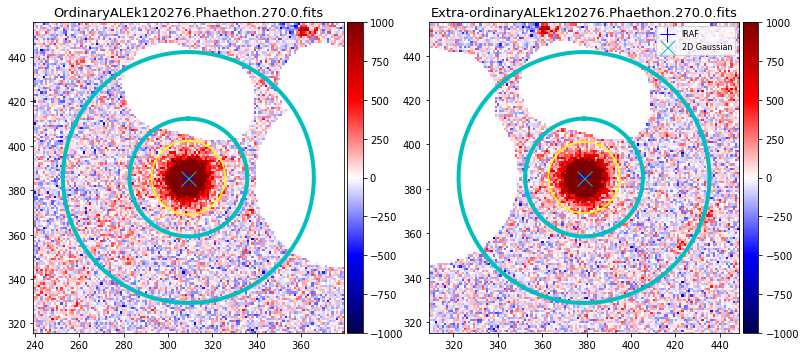

/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120277.Phaethon.292.5.fits
/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120277.Phaethon.292.5.fits.mag.1


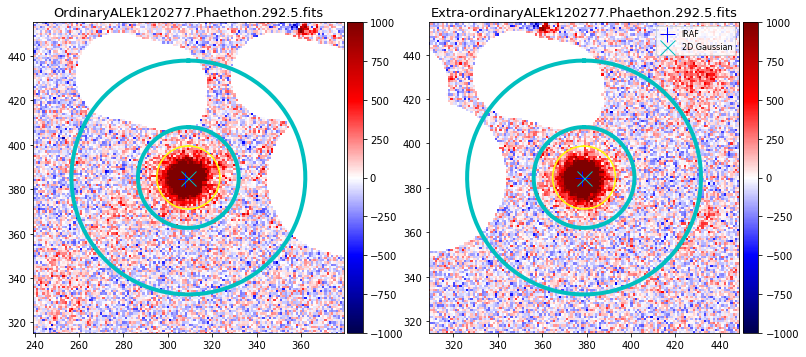

/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120278.Phaethon.315.0.fits
/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120278.Phaethon.315.0.fits.mag.1


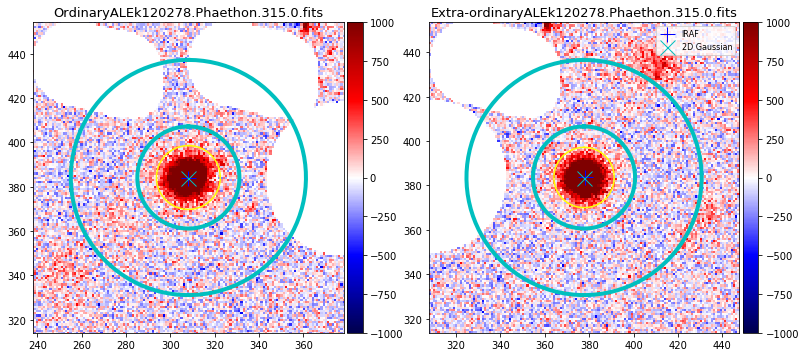

/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120279.Phaethon.337.5.fits
/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120279.Phaethon.337.5.fits.mag.1


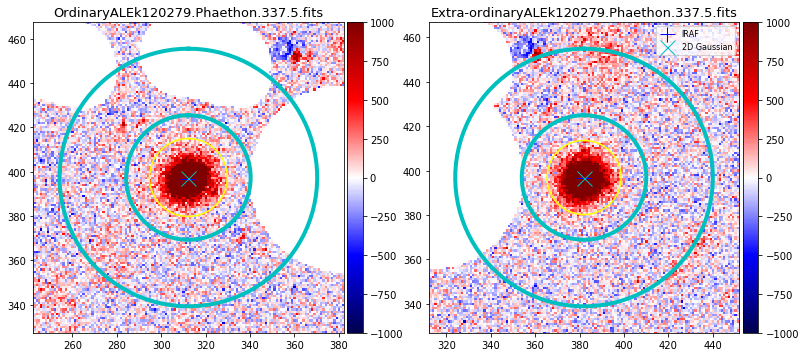

/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120280.Phaethon.0.0.fits
/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120280.Phaethon.0.0.fits.mag.1


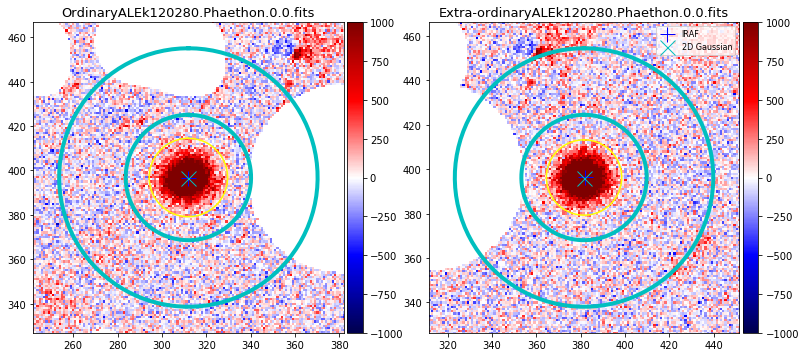

/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120281.Phaethon.22.5.fits
/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120281.Phaethon.22.5.fits.mag.1


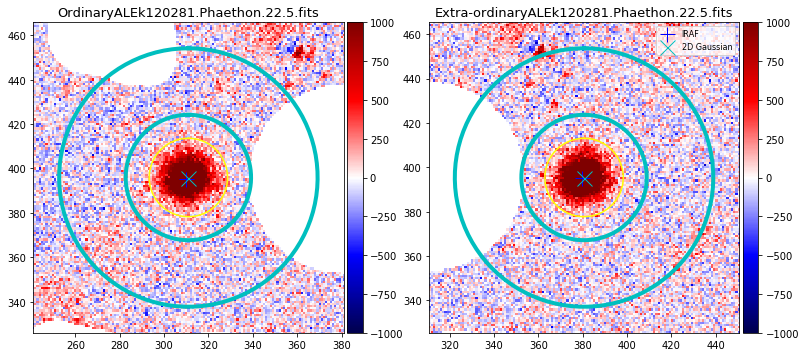

/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120282.Phaethon.45.0.fits
/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120282.Phaethon.45.0.fits.mag.1


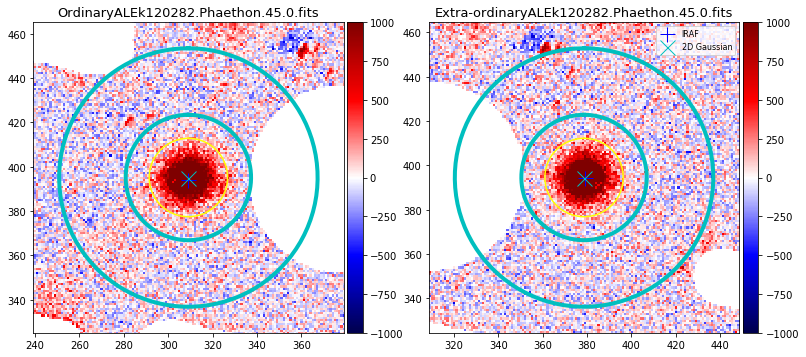

/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120283.Phaethon.67.5.fits
/home/judy/Downloads/P64_phaethon_polarimetry/211112/target/reduced/ALEk120283.Phaethon.67.5.fits.mag.1


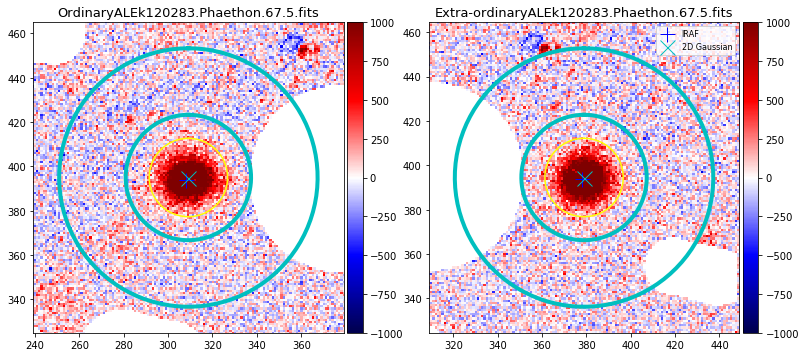

In [7]:

#======================================#
#             Photometry               #
#======================================#

Photo_Log = pd.DataFrame({})

for file in filelist:
    print(file)
    hdul = fits.open(file)[0]
    data = hdul.data
    header = hdul.header

    OBJECT = header['OBJECT']
    JD = Time(header['DATE-OBS'],format='isot').jd
    epoch = header['DATE-OBS']
    exptime = header['EXPTIME'] #in sec    
    EXPTIME = header['EXPTIME'] / (24*60*60)  #in jd
    EXP_str = Time(header['DATE-OBS'],format='isot').jd
    EXP_end = EXP_str + EXPTIME
    try:
        header['GAIN']
    except KeyError:
        gain = 0.16
        RN = 4.3
    else:
        gain = header['GAIN']
        RN = header['RDNOISE']



    RET1 = os.path.join(path,file.split('/')[-1])
    #Bring the x,y information of object from .mag.1
    mag = ascii.read(RET1+'.mag.1')
    print(RET1+'.mag.1')
    xo = mag['XCENTER'][0] - 1
    yo = mag['YCENTER'][0] - 1

    xe = xo+70
    ye = yo

    #Bring Masking image
    mask_name = os.path.join(path,'mask_'+os.path.split(file)[-1])
    hdul_mask = fits.open(mask_name)[0]
    masking = hdul_mask.data  
    masking = (masking).astype(bool)
    masking_o = np.copy(masking)
    masking_e = np.copy(masking)


    Masked_image = np.ma.masked_array(data, masking)



    #Find the center & FWHM==========================================================

    #Determine FWHM
    ## Ordinary
    y_1, y_2 = int(yo-20), int(yo+20)
    x_1, x_2 = int(xo-20), int(xo+20)
    crop_o = data[y_1:y_2,x_1:x_2]
    crop_o = crop_o - np.median(crop_o[:,:10])
    y, x = np.mgrid[:len(crop_o), :len(crop_o[0])]
    g_init = Gaussian2D(x_mean = 20,y_mean=20,
                        theta=0,
                        amplitude=crop_o[20,20],
                        bounds={'x_mean':(18,22),
                                'y_mean':(18,22)})

    fitter = LevMarLSQFitter()
    fitted = fitter(g_init, x,y, crop_o)
    center_x = fitted.x_mean.value
    center_y = fitted.y_mean.value
    fwhm_o = max(fitted.x_fwhm,fitted.y_fwhm)

    ## Extra-Ordinary
    y_1, y_2 = int(ye-20), int(ye+20)
    x_1, x_2 = int(xe-20), int(xe+20)
    crop_e = data[y_1:y_2,x_1:x_2]
    crop_e = crop_e - np.median(crop_e[:,:10])
    y, x = np.mgrid[:len(crop_e), :len(crop_e[0])]
    g_init = Gaussian2D(x_mean = 20,y_mean=20,
                        theta=0,
                        amplitude=crop_e[20,20],
                        bounds={'x_mean':(18,22),
                                'y_mean':(18,22)})

    fitter = LevMarLSQFitter()
    fitted = fitter(g_init, x,y, crop_e)
    center_x = fitted.x_mean.value
    center_y = fitted.y_mean.value
    fwhm_e = max(fitted.x_fwhm,fitted.y_fwhm)    

    #masking the ordinary or extraordinary component
    scale_masking = 6
    mask_fwhm = max(fwhm_o,fwhm_e)
    for yi in range(len(masking)):
        for xi in range(len(masking[0])):
            if (xi - xo)**2 + (yi-yo)**2 < (scale_masking*mask_fwhm/2)**2 :
                masking_e[yi,xi] = 1    
            if (xi - xe)**2 + (yi-ye)**2 < (scale_masking*mask_fwhm/2)**2 :   
                masking_o[yi,xi] = 1    


    #### Re-Determine FWHM
    ######### Ordinary part
    y_1, y_2 = int(yo-20), int(yo+20)
    x_1, x_2 = int(xo-20), int(xo+20)


    crop_data = data[y_1:y_2,x_1:x_2]
    sky_tem,std_tem,sky_area_tem = skyvalue(data,yo,xo,25,35,masking_o)
    crop_data_sub = crop_data-sky_tem
    masking2 = masking_o[y_1:y_2,x_1:x_2]
    data2 = np.ma.masked_array(crop_data_sub,masking2)
    y, x = np.mgrid[:len(crop_data), :len(crop_data[0])]
    g_init = Gaussian2D(x_mean = 20,y_mean=20,
                        x_stddev = 10*gaussian_fwhm_to_sigma,
                        y_stddev = 10*gaussian_fwhm_to_sigma,
                        amplitude=crop_o[20,20],
                        theta=0,
                        bounds={'x_mean':(15,25),
                                'y_mean':(15,25),
                                'x_stddev':(0.8,6),
                                'y_stddev':(0.8,6)})

    fitter = LevMarLSQFitter()
    fitted = fitter(g_init, x,y, data2)
    center_x = fitted.x_mean.value
    center_y = fitted.y_mean.value
    std_aper = max([fitted.x_stddev.value,fitted.y_stddev.value])

    re_g_init = Gaussian2D(amplitude=fitted.amplitude.value, 
                           x_mean = center_x,
                           y_mean = center_y,
                           x_stddev = fitted.x_stddev.value,
                           y_stddev = fitted.y_stddev.value)
    fitter = LevMarLSQFitter()
    fitted = fitter(re_g_init, x,y,data2)
    FWHM_AP_ordi = max([re_g_init.x_fwhm,re_g_init.y_fwhm])
    amp_o = re_g_init.amplitude.value

    xo_new = fitted.x_mean.value + (xo-20)
    yo_new = fitted.y_mean.value + (yo-20)


#     if fig_plot == 'yes':

#         fig,ax1 = plt.subplots(1,2,figsize=(12,4))
#         ax1[0].imshow(data2)
#         ax1[0].plot(fitted.x_mean.value,fitted.y_mean.value,marker='x',color='r',ms=10,
#                     label='Fitted 2D G\n FWHM = {0:.2f}[pix]'.format(FWHM_AP_ordi))
#         ax1[0].contour(x, y, fitted(x,y), 3, colors='w')
#         ax1[0].set_title('Ordinary  '+ file.split('/')[-1])
#         ax1[0].legend()  

    ######### Extra-ordinary part
    y_1, y_2 = int(ye-20), int(ye+20)
    x_1, x_2 = int(xe-20), int(xe+20)

    crop_data = data[y_1:y_2,x_1:x_2]
    sky_tem,std_tem,sky_area_tem = skyvalue(data,ye,xe,20,30,masking_e)
    crop_data_sub = crop_data-sky_tem
    masking2 = masking_e[y_1:y_2,x_1:x_2]
    data2 = np.ma.masked_array(crop_data_sub,masking2)
    y, x = np.mgrid[:len(crop_data), :len(crop_data[0])]
    g_init = Gaussian2D(x_mean = 20,y_mean=20,
                        x_stddev = 10*gaussian_fwhm_to_sigma,
                        y_stddev = 10*gaussian_fwhm_to_sigma,
                        amplitude=crop_e[20,20],
                        theta=0,
                        bounds={'x_mean':(15,25),
                                'y_mean':(15,25),
                                'x_stddev':(0.8,6),
                                'y_stddev':(0.8,6)})

    fitter = LevMarLSQFitter()
    fitted = fitter(g_init, x,y, data2)
    center_x = fitted.x_mean.value
    center_y = fitted.y_mean.value
    std_aper = max([fitted.x_stddev.value,fitted.y_stddev.value])

    re_g_init = Gaussian2D(amplitude=fitted.amplitude.value, 
                           x_mean = center_x,
                           y_mean = center_y,
                           x_stddev = fitted.x_stddev.value,
                           y_stddev = fitted.y_stddev.value)
    fitter = LevMarLSQFitter()
    fitted = fitter(re_g_init, x,y,data2)
    FWHM_AP_extra = max([re_g_init.x_fwhm,re_g_init.y_fwhm])
    amp_e = re_g_init.amplitude.value

    xe_new = fitted.x_mean.value + (xe-20)
    ye_new = fitted.y_mean.value + (ye-20)

#     if fig_plot == 'yes':

#         ax1[1].imshow(data2)
#         ax1[1].plot(fitted.x_mean.value,fitted.y_mean.value,marker='x',color='r',ms=10,
#                     ls='',label='Fitted 2D G\n FWHM = {0:.2f}[pix]'.format(FWHM_AP_extra))
#         ax1[1].contour(x, y, fitted(x,y), 3, colors='w')
#         ax1[1].set_title('Extra-ordinary  '+ file.split('/')[-1])
#         ax1[1].legend()  
#     plt.show()    


    #Select the larger FWHM 
    FWHM_sel = max(FWHM_AP_ordi,FWHM_AP_extra)

    hdul_mask = fits.open(mask_name)[0]
    masking = hdul_mask.data  
    cosmic_ray_mask = masking==1

    # Interpolate bad pixel
    data = data.byteswap().newbyteorder()      
    bkg_ = sep.Background(data, mask=masking.astype(bool), bw=5, bh=5, fw=5, fh=5)
    bkg_image_ = bkg_.back()      
    old_data_ = np.copy(data)
    data[cosmic_ray_mask] = bkg_image_[cosmic_ray_mask]



    hdul_mask = fits.open(mask_name)[0]
    masking = hdul_mask.data  
    star_mask = masking>2
   #Making the new masking image with new center
    masking_o = np.zeros(np.shape(masking))
    masking_e = np.zeros(np.shape(masking))
    #masking the ordinary or extraordinary component
    for yi in range(len(star_mask)):
        for xi in range(len(star_mask[0])):
            if (xi - xo_new)**2 + (yi-yo_new)**2 < (scale_masking*FWHM_sel/2)**2 :
                masking_e[yi,xi] = 1    
            if (xi - xe_new)**2 + (yi-ye_new)**2 < (scale_masking*FWHM_sel/2)**2 :   
                masking_o[yi,xi] = 1  


    #Masking image (maksing: target + stars)
    masking_e = masking_e+star_mask
    masking_o = masking_o+star_mask


    #### Set aperture size
    Aperture_radius_o = Aperture_scale*FWHM_AP_ordi/2
    Aperture_radius_e = Aperture_scale*FWHM_AP_extra/2

    Ann = ANN_scale*FWHM_sel/2
    Ann_out = Ann+Dan

    ##Determine sky value by aperture   
    Aper_o = CircularAperture([xo_new,yo_new],Aperture_radius_o) #Set aperture
    sky_o,sky_std_o,area_o = skyvalue(data,yo_new,xo_new,Ann,Ann_out,masking_o) # Set area determinung Sk #[count]

    Aper_e = CircularAperture([xe_new,ye_new],Aperture_radius_e) #Set aperture
    sky_e,sky_std_e,area_e = skyvalue(data,ye_new,xe_new,Ann,Ann_out,masking_e) # Set area determinung Sk


    Flux_o = aperture_photometry(data - sky_o,Aper_o,masking_o)['aperture_sum'][0]
    ERR_o = np.sqrt(Flux_o + 3.14*Aperture_radius_o**2*(sky_std_o**2 +(RN)**2))
    Snr_o = signal_to_noise_oir_ccd(1,Flux_o,sky_std_o,RN,Aperture_radius_o**2*3.14)

    Flux_e = aperture_photometry(data - sky_e, Aper_e,masking_e)['aperture_sum'][0]
    Sum_e = aperture_photometry(data,Aper_e)['aperture_sum'][0]
    ERR_e = np.sqrt(Flux_e + 3.14*Aperture_radius_e**2*(sky_std_e**2 + (RN)**2))
    Snr_e = signal_to_noise_oir_ccd(1,Flux_e,sky_std_e,RN,Aperture_radius_e**2*3.14)

    if fig_plot == 'yes':
        figsize = 70
        fig,ax = plt.subplots(1,2,figsize=(13,6))
        plot_data = np.ma.masked_array(data,masking_o)
        vmin,vmax = -1000,1000
        im = ax[0].imshow(plot_data - sky_o,vmin=vmin,vmax=vmax,cmap='seismic')
        xi,yi = circle(xo_new,yo_new,Aperture_radius_o)
        ax[0].plot(xi,yi,color='yellow',lw=1.5)
        xi,yi = circle(xo_new,yo_new,Ann)
        ax[0].plot(xi,yi ,color='c',lw=4)
        xi,yi = circle(xo_new,yo_new,Ann_out)
        ax[0].plot(xi,yi ,color='c',lw=4)
        ax[0].plot(xo,yo,marker='+',ls='',ms=15,color='b')
        ax[0].plot(xo_new,yo_new,marker='x',ms=15,ls='',color='c')
        ax[0].set_xlim(xo_new-figsize,xo_new+figsize)
        ax[0].set_ylim(yo_new-figsize,yo_new+figsize)
        ax[0].set_title('Ordinary'+file.split('/')[-1],fontsize=13)
        divider = make_axes_locatable(ax[0])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im,cax=cax) 

        plot_data = np.ma.masked_array(data,masking_e)
        im = ax[1].imshow(plot_data - sky_e,vmin=vmin,vmax=vmax,cmap='seismic')
        xi,yi = circle(xe_new,ye_new,Aperture_radius_e)
        ax[1].plot(xi,yi,color='yellow',lw=1.5)
        xi,yi = circle(xe_new,ye_new,Ann)
        ax[1].plot(xi,yi ,color='c',lw=4)
        xi,yi = circle(xe_new,ye_new,Ann_out)
        ax[1].plot(xi,yi ,color='c',lw=4)
        ax[1].plot(xe,ye,marker='+',ls='',ms=15,color='b',label='IRAF')
        ax[1].plot(xe_new,ye_new,marker='x',ms=15,ls='',color='c',label='2D Gaussian')
        ax[1].set_xlim(xe_new-figsize,xe_new+figsize)
        ax[1].set_ylim(ye_new-figsize,ye_new+figsize)
        ax[1].set_title('Extra-ordinary'+file.split('/')[-1],fontsize=13)
        ax[1].legend(fontsize=8)
        divider = make_axes_locatable(ax[1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im,cax=cax) 
        plt.show()




    Photo_Log = Photo_Log.append({'Object': OBJECT,
                                  'Filename':file.split('/')[-1],
                                  'HWPANG':header['FARETANG'],
                                  'Filter':header['ALFLTNM'],
                                  'TIME':epoch,
                                  'DATE':epoch.split('T')[0],
                                  'JD':JD,
                                  'FWHM_o':FWHM_AP_ordi,
                                  'FWHM_e':FWHM_AP_extra,
                                  'Aper_e [pix]':Aperture_radius_e,
                                  'Aper_o [pix]':Aperture_radius_o,
                                  'EXP [s]':exptime,
                                  'Ann':Ann,
                                  'Ann_out':Ann_out,
                                  'Flux_o':Flux_o,
                                  'eFlux_o':ERR_o,
                                  'Flux_e':Flux_e,
                                  'eFlux_e':ERR_e,
                                  'SNR_o':Snr_o,
                                  'SNR_e':Snr_e,
                                  'Sky_o':sky_o,
                                  'eSky_o':sky_std_o,
                                  'Sky_e':sky_e,
                                  'eSky_e':sky_std_e,
                                  'Airmass':header['AIRMASS']}, ignore_index=True)      


new_index = ['Filename', 'Object','DATE','HWPANG','Filter','TIME','JD','EXP [s]',
             'Flux_o','eFlux_o','Flux_e','eFlux_e',
             'SNR_o','SNR_e','FWHM_o','FWHM_e',
             'Aper_o [pix]','Aper_e [pix]','Ann','Ann_out',
             'Sky_o','eSky_o','Sky_e','eSky_e','Airmass']
Photo_Log = Photo_Log.reindex(columns = new_index)  
Photo_Log = Photo_Log.round({'Flux_o': 1, 'Flux_e': 1,'eFlux_o': 1,'eFlux_e': 1,
                            'SNR_o': 0, 'SNR_e': 0, 'FWHM_o': 1, 'FWHM_e': 1,
                            'Aper_o [pix]': 1,'Aper_e [pix]': 1,'Ann': 0,'Ann_out': 0,
                             'Sky_o': 1,'eSky_o': 1,'Sky_e': 1,'eSky_e': 1,'Airmass': 1})



Object_name = OBJECT.split(' ')[0]
DATE = epoch.split('T')[0].replace('-','_')
FILENAME = 'Phot_'+DATE+'_'+Object_name+'.csv'


Log_file = pd.DataFrame({'Object': [OBJECT.split(' ')[0]],
                         'Date':[epoch.split('T')[0].replace('-','_')],
                        'aperture_scale':[Aperture_scale],
                        'ANN_scale':[ANN_scale],
                        'Dan':[Dan],
                        'MASK_scale':[scale_masking]})
Log_file.to_csv(os.path.join(path,'Log_{0}_{1}.csv'.format(epoch.split('T')[0].replace('-','_'),OBJECT.split(' ')[0])))

In [8]:
Photo_Log

,Filename,Object,DATE,HWPANG,Filter,TIME,JD,EXP [s],Flux_o,eFlux_o,...,FWHM_e,Aper_o [pix],Aper_e [pix],Ann,Ann_out,Sky_o,eSky_o,Sky_e,eSky_e,Airmass
0,ALEk120276.Phaethon.270.0.fits,Phaethon 270deg,2021-11-13,270.0,R_Bes 650_130,2021-11-13T01:13:24.624,2.459532e+06,180.0,661150.2,4714.5,...,12.8,16.6,16.0,27.0,57.0,4116.7,157.8,4116.6,157.5,1.0
1,ALEk120277.Phaethon.292.5.fits,Phaethon 292.5deg,2021-11-13,292.5,R_Bes 650_130,2021-11-13T01:16:32.260,2.459532e+06,180.0,669501.3,4121.5,...,11.3,14.2,14.2,23.0,53.0,4066.1,160.5,4069.6,163.1,1.0
2,ALEk120278.Phaethon.315.0.fits,Phaethon 315deg,2021-11-13,315.0,R_Bes 650_130,2021-11-13T01:19:39.923,2.459532e+06,180.0,693407.1,4120.1,...,10.9,14.4,13.6,23.0,53.0,4016.4,158.3,4021.5,161.4,1.0
3,ALEk120279.Phaethon.337.5.fits,Phaethon 337.5deg,2021-11-13,337.5,R_Bes 650_130,2021-11-13T01:22:47.566,2.459532e+06,180.0,716800.8,5169.1,...,13.3,17.5,16.7,28.0,58.0,4032.7,164.0,4036.4,162.4,1.0
4,ALEk120280.Phaethon.0.0.fits,Phaethon 0deg,2021-11-13,0.0,R_Bes 650_130,2021-11-13T01:25:55.979,2.459532e+06,180.0,710413.6,5281.3,...,13.6,17.7,17.0,28.0,58.0,4004.4,166.5,4004.4,163.7,1.0
5,ALEk120281.Phaethon.22.5.fits,Phaethon 22.5deg,2021-11-13,22.5,R_Bes 650_130,2021-11-13T01:29:04.235,2.459532e+06,180.0,679617.8,5154.1,...,14.1,17.7,17.7,28.0,58.0,3985.3,162.5,3996.7,157.0,1.0
6,ALEk120282.Phaethon.45.0.fits,Phaethon 45deg,2021-11-13,45.0,R_Bes 650_130,2021-11-13T01:32:12.386,2.459532e+06,180.0,685758.8,5039.7,...,14.1,17.7,17.7,28.0,58.0,3889.3,158.8,3899.2,155.7,1.0
7,ALEk120283.Phaethon.67.5.fits,Phaethon 67.5deg,2021-11-13,67.5,R_Bes 650_130,2021-11-13T01:35:20.499,2.459532e+06,180.0,693313.8,4970.0,...,14.1,17.7,17.7,28.0,58.0,3812.2,156.5,3812.7,154.1,1.0
